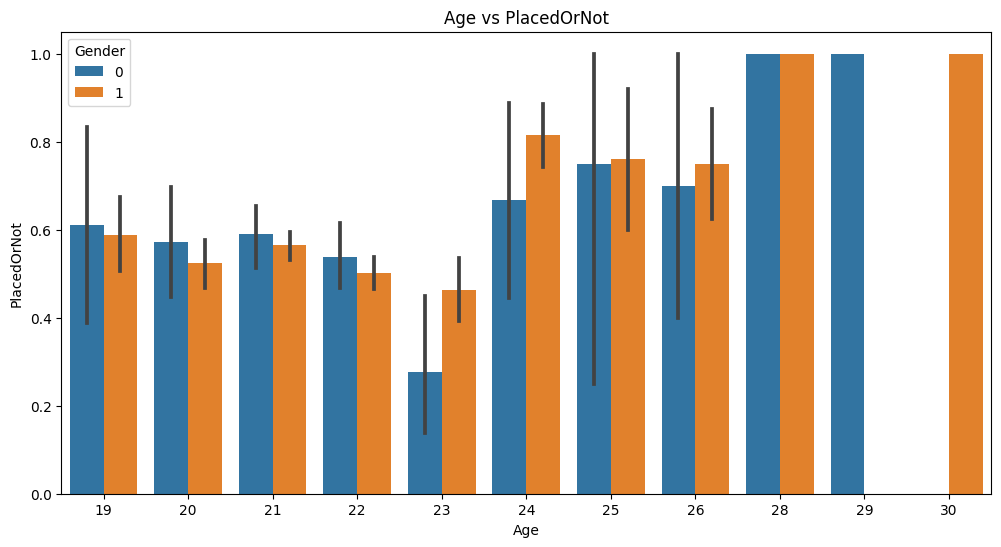

Random Forest Cross-validation scores: [0.8463094  0.84934277 0.89878543]
Random Forest Mean accuracy: 0.8648125330047526


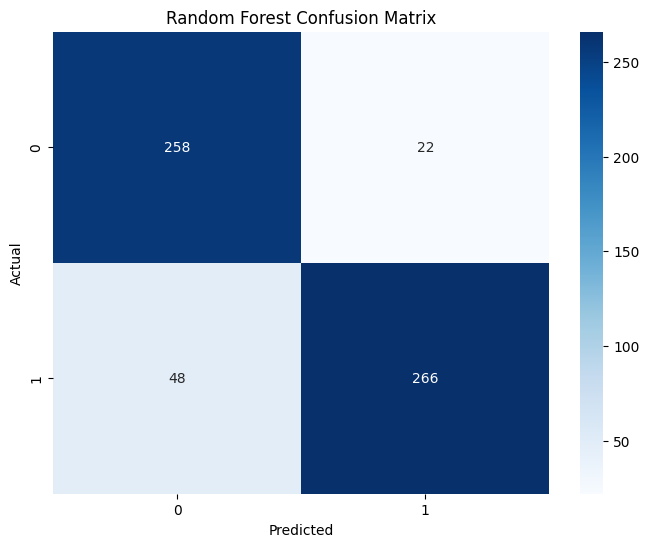

Random Forest Accuracy: 0.8648125330047526


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv('collegePlace.csv')

# Data preprocessing
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Stream = le.fit_transform(df.Stream)
x = df.drop(['PlacedOrNot'], axis=1)
y = df.PlacedOrNot

# Data visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='PlacedOrNot', hue='Gender', data=df)
plt.title("Age vs PlacedOrNot")
plt.show()

# Model selection and evaluation

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_scores = cross_val_score(rf_model, x, y, cv=3)
rf_accuracy = rf_scores.mean()
print("Random Forest Cross-validation scores:", rf_scores)
print("Random Forest Mean accuracy:", rf_accuracy)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate confusion matrix and plot heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

print("Random Forest Accuracy:", rf_accuracy)
